In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Read train.csv data

In [2]:
#df = pd.read_csv("https://github.com/Jessadakorn-pun/Dataset/raw/main/cnc_dataset/experiment_01.csv")
#for e in range(2, 19):
#    url = f"https://github.com/Jessadakorn-pun/Dataset/raw/main/cnc_dataset/experiment_{e:02}.csv"
#    data = pd.read_csv(url)
#    df = pd.concat([df, data], axis = 0)

#df

In [3]:
url = "https://github.com/Jessadakorn-pun/Dataset/raw/main/cnc_dataset/train.csv"
df = pd.read_csv(url)
df

,No,material,feedrate,clamp_pressure,tool_condition,machining_finalized,passed_visual_inspection
0,1,wax,6,4.0,unworn,yes,yes
1,2,wax,20,4.0,unworn,yes,yes
2,3,wax,6,3.0,unworn,yes,yes
3,4,wax,6,2.5,unworn,no,NaN
4,5,wax,20,3.0,unworn,no,NaN
5,6,wax,6,4.0,worn,yes,no
6,7,wax,20,4.0,worn,no,NaN
7,8,wax,20,4.0,worn,yes,no
8,9,wax,15,4.0,worn,yes,no
9,10,wax,12,4.0,worn,yes,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   No                        18 non-null     int64  
 1   material                  18 non-null     object 
 2   feedrate                  18 non-null     int64  
 3   clamp_pressure            18 non-null     float64
 4   tool_condition            18 non-null     object 
 5   machining_finalized       18 non-null     object 
 6   passed_visual_inspection  14 non-null     object 
dtypes: float64(1), int64(2), object(4)
memory usage: 1.1+ KB


In [5]:
df.passed_visual_inspection.value_counts(dropna = False)

passed_visual_inspection
yes    10
NaN     4
no      4
Name: count, dtype: int64

# Deal with Nan

In [6]:
## fill na with no in columns passed_visual_inspection
imp = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='no')
df['passed_visual_inspection'] = pd.DataFrame(imp.fit_transform(df[['passed_visual_inspection']]))
df

,No,material,feedrate,clamp_pressure,tool_condition,machining_finalized,passed_visual_inspection
0,1,wax,6,4.0,unworn,yes,yes
1,2,wax,20,4.0,unworn,yes,yes
2,3,wax,6,3.0,unworn,yes,yes
3,4,wax,6,2.5,unworn,no,no
4,5,wax,20,3.0,unworn,no,no
5,6,wax,6,4.0,worn,yes,no
6,7,wax,20,4.0,worn,no,no
7,8,wax,20,4.0,worn,yes,no
8,9,wax,15,4.0,worn,yes,no
9,10,wax,12,4.0,worn,yes,no


# Read experiment_.csv

In [7]:
# Read 'experimental_.csv'
ds = pd.read_csv("https://github.com/Jessadakorn-pun/Dataset/raw/main/cnc_dataset/experiment_01.csv")
ds

,X1_ActualPosition,X1_ActualVelocity,X1_ActualAcceleration,X1_CommandPosition,X1_CommandVelocity,X1_CommandAcceleration,X1_CurrentFeedback,X1_DCBusVoltage,X1_OutputCurrent,X1_OutputVoltage,...,S1_CurrentFeedback,S1_DCBusVoltage,S1_OutputCurrent,S1_OutputVoltage,S1_OutputPower,S1_SystemInertia,M1_CURRENT_PROGRAM_NUMBER,M1_sequence_number,M1_CURRENT_FEEDRATE,Machining_Process
0,198.0,0.000,0.00,198.0,0.0,0.000000,0.18,0.0207,329.0,2.77,...,0.5240,2.740000e-19,329.0,0.0,6.960000e-07,12.0,1.0,0.0,50.0,Starting
1,198.0,-10.800,-350.00,198.0,-13.6,-358.000000,-10.90,0.1860,328.0,23.30,...,-0.2880,2.740000e-19,328.0,0.0,-5.270000e-07,12.0,1.0,4.0,50.0,Prep
2,196.0,-17.800,-6.25,196.0,-17.9,-0.000095,-8.59,0.1400,328.0,30.60,...,0.5240,2.740000e-19,328.0,0.0,9.100000e-07,12.0,1.0,7.0,50.0,Prep
3,194.0,-18.000,0.00,194.0,-17.9,-0.000095,-6.11,0.1300,327.0,30.30,...,-0.1800,2.740000e-19,328.0,0.0,1.070000e-06,12.0,1.0,7.0,50.0,Prep
4,193.0,-17.900,-18.80,192.0,-17.9,0.000095,-5.70,0.1140,328.0,30.50,...,0.2260,2.740000e-19,328.0,0.0,1.960000e-06,12.0,1.0,7.0,50.0,Prep
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,141.0,0.175,87.50,141.0,0.0,0.000000,-2.84,0.0522,325.0,7.39,...,20.5000,9.310000e-01,319.0,118.0,1.790000e-01,12.0,1.0,132.0,50.0,end
1051,141.0,-0.150,-87.50,141.0,0.0,0.000000,-1.85,0.0522,325.0,2.69,...,15.8000,7.200000e-01,319.0,117.0,1.380000e-01,12.0,1.0,132.0,50.0,end
1052,141.0,-0.175,-87.50,141.0,0.0,0.000000,-2.20,0.0527,325.0,2.22,...,24.3000,1.000000e+00,318.0,120.0,1.920000e-01,12.0,1.0,132.0,50.0,end
1053,141.0,0.150,87.50,141.0,0.0,0.000000,-4.02,0.0502,326.0,5.80,...,22.4000,9.290000e-01,321.0,120.0,1.780000e-01,12.0,1.0,132.0,50.0,end


In [8]:
ds.Machining_Process.value_counts()

Machining_Process
Layer 2 Up       203
Layer 3 Up       194
Layer 1 Up       172
Layer 1 Down     148
Layer 3 Down     142
Layer 2 Down     132
Prep              30
Repositioning     25
end                8
Starting           1
Name: count, dtype: int64

In [9]:
df[df['No'] == 1].iloc[0]

No                               1
material                       wax
feedrate                         6
clamp_pressure                 4.0
tool_condition              unworn
machining_finalized            yes
passed_visual_inspection       yes
Name: 0, dtype: object

In [10]:
frames = []
for e in range(1, 19):
    url = f"https://github.com/Jessadakorn-pun/Dataset/raw/main/cnc_dataset/experiment_{e:02}.csv"
    frame = pd.read_csv(url)
    
    ## loear each experiment result row
    exp_result_row = df[df['No'] == e]
    frame['exp_num'] = e
    
    ## add experiment setting to features
    frame['material'] = exp_result_row.iloc[0]['material']
    frame['feedrate'] = exp_result_row.iloc[0]['feedrate']
    frame['clamp_pressure'] = exp_result_row.iloc[0]['clamp_pressure']
    
    ## add eperiment result to features
    frame['tool_condition'] = exp_result_row.iloc[0]['tool_condition']
    frame['machining_finalized'] = exp_result_row.iloc[0]['machining_finalized']
    frame['passed_visual_inspection'] = exp_result_row.iloc[0]['passed_visual_inspection']
    
    frames.append(frame)
    
result = pd.concat(frames, axis = 0)

In [11]:
result

,X1_ActualPosition,X1_ActualVelocity,X1_ActualAcceleration,X1_CommandPosition,X1_CommandVelocity,X1_CommandAcceleration,X1_CurrentFeedback,X1_DCBusVoltage,X1_OutputCurrent,X1_OutputVoltage,...,M1_sequence_number,M1_CURRENT_FEEDRATE,Machining_Process,exp_num,material,feedrate,clamp_pressure,tool_condition,machining_finalized,passed_visual_inspection
0,198.0,0.00,0.00,198.0,0.00,0.000000,0.18,0.0207,329.0,2.77,...,0.0,50.0,Starting,1,wax,6,4.0,unworn,yes,yes
1,198.0,-10.80,-350.00,198.0,-13.60,-358.000000,-10.90,0.1860,328.0,23.30,...,4.0,50.0,Prep,1,wax,6,4.0,unworn,yes,yes
2,196.0,-17.80,-6.25,196.0,-17.90,-0.000095,-8.59,0.1400,328.0,30.60,...,7.0,50.0,Prep,1,wax,6,4.0,unworn,yes,yes
3,194.0,-18.00,0.00,194.0,-17.90,-0.000095,-6.11,0.1300,327.0,30.30,...,7.0,50.0,Prep,1,wax,6,4.0,unworn,yes,yes
4,193.0,-17.90,-18.80,192.0,-17.90,0.000095,-5.70,0.1140,328.0,30.50,...,7.0,50.0,Prep,1,wax,6,4.0,unworn,yes,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248,144.0,-2.30,100.00,144.0,-2.57,0.977000,-5.05,0.0732,327.0,9.56,...,57.0,3.0,End,18,wax,3,2.5,worn,yes,yes
2249,144.0,-2.47,25.00,144.0,-2.46,1.080000,-5.62,0.0996,327.0,10.30,...,57.0,3.0,End,18,wax,3,2.5,worn,yes,yes
2250,143.0,-2.20,81.20,143.0,-2.35,1.170000,-4.42,0.0539,327.0,7.79,...,57.0,3.0,End,18,wax,3,2.5,worn,yes,yes
2251,143.0,-2.05,68.70,143.0,-2.23,1.260000,-5.83,0.0809,327.0,8.32,...,57.0,3.0,End,18,wax,3,2.5,worn,yes,yes


In [12]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25286 entries, 0 to 2252
Data columns (total 55 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   X1_ActualPosition          25286 non-null  float64
 1   X1_ActualVelocity          25286 non-null  float64
 2   X1_ActualAcceleration      25286 non-null  float64
 3   X1_CommandPosition         25286 non-null  float64
 4   X1_CommandVelocity         25286 non-null  float64
 5   X1_CommandAcceleration     25286 non-null  float64
 6   X1_CurrentFeedback         25286 non-null  float64
 7   X1_DCBusVoltage            25286 non-null  float64
 8   X1_OutputCurrent           25286 non-null  float64
 9   X1_OutputVoltage           25286 non-null  float64
 10  X1_OutputPower             25286 non-null  float64
 11  Y1_ActualPosition          25286 non-null  float64
 12  Y1_ActualVelocity          25286 non-null  float64
 13  Y1_ActualAcceleration      25286 non-null  float64
 

In [13]:
result.columns

Index(['X1_ActualPosition', 'X1_ActualVelocity', 'X1_ActualAcceleration',
       'X1_CommandPosition', 'X1_CommandVelocity', 'X1_CommandAcceleration',
       'X1_CurrentFeedback', 'X1_DCBusVoltage', 'X1_OutputCurrent',
       'X1_OutputVoltage', 'X1_OutputPower', 'Y1_ActualPosition',
       'Y1_ActualVelocity', 'Y1_ActualAcceleration', 'Y1_CommandPosition',
       'Y1_CommandVelocity', 'Y1_CommandAcceleration', 'Y1_CurrentFeedback',
       'Y1_DCBusVoltage', 'Y1_OutputCurrent', 'Y1_OutputVoltage',
       'Y1_OutputPower', 'Z1_ActualPosition', 'Z1_ActualVelocity',
       'Z1_ActualAcceleration', 'Z1_CommandPosition', 'Z1_CommandVelocity',
       'Z1_CommandAcceleration', 'Z1_CurrentFeedback', 'Z1_DCBusVoltage',
       'Z1_OutputCurrent', 'Z1_OutputVoltage', 'S1_ActualPosition',
       'S1_ActualVelocity', 'S1_ActualAcceleration', 'S1_CommandPosition',
       'S1_CommandVelocity', 'S1_CommandAcceleration', 'S1_CurrentFeedback',
       'S1_DCBusVoltage', 'S1_OutputCurrent', 'S1_OutputVolt

In [14]:
## category columns
allCols = list(result.columns)
catCols = ['Machining_Process', 'material', 'tool_condition', 'machining_finalized', 'passed_visual_inspection', 'exp_num']

## numerical columns
numCols = [item for item in allCols if item not in catCols]

In [15]:
print(catCols)

['Machining_Process', 'material', 'tool_condition', 'machining_finalized', 'passed_visual_inspection', 'exp_num']


In [16]:
print(numCols)

['X1_ActualPosition', 'X1_ActualVelocity', 'X1_ActualAcceleration', 'X1_CommandPosition', 'X1_CommandVelocity', 'X1_CommandAcceleration', 'X1_CurrentFeedback', 'X1_DCBusVoltage', 'X1_OutputCurrent', 'X1_OutputVoltage', 'X1_OutputPower', 'Y1_ActualPosition', 'Y1_ActualVelocity', 'Y1_ActualAcceleration', 'Y1_CommandPosition', 'Y1_CommandVelocity', 'Y1_CommandAcceleration', 'Y1_CurrentFeedback', 'Y1_DCBusVoltage', 'Y1_OutputCurrent', 'Y1_OutputVoltage', 'Y1_OutputPower', 'Z1_ActualPosition', 'Z1_ActualVelocity', 'Z1_ActualAcceleration', 'Z1_CommandPosition', 'Z1_CommandVelocity', 'Z1_CommandAcceleration', 'Z1_CurrentFeedback', 'Z1_DCBusVoltage', 'Z1_OutputCurrent', 'Z1_OutputVoltage', 'S1_ActualPosition', 'S1_ActualVelocity', 'S1_ActualAcceleration', 'S1_CommandPosition', 'S1_CommandVelocity', 'S1_CommandAcceleration', 'S1_CurrentFeedback', 'S1_DCBusVoltage', 'S1_OutputCurrent', 'S1_OutputVoltage', 'S1_OutputPower', 'S1_SystemInertia', 'M1_CURRENT_PROGRAM_NUMBER', 'M1_sequence_number', 'M

# Explore Dataset

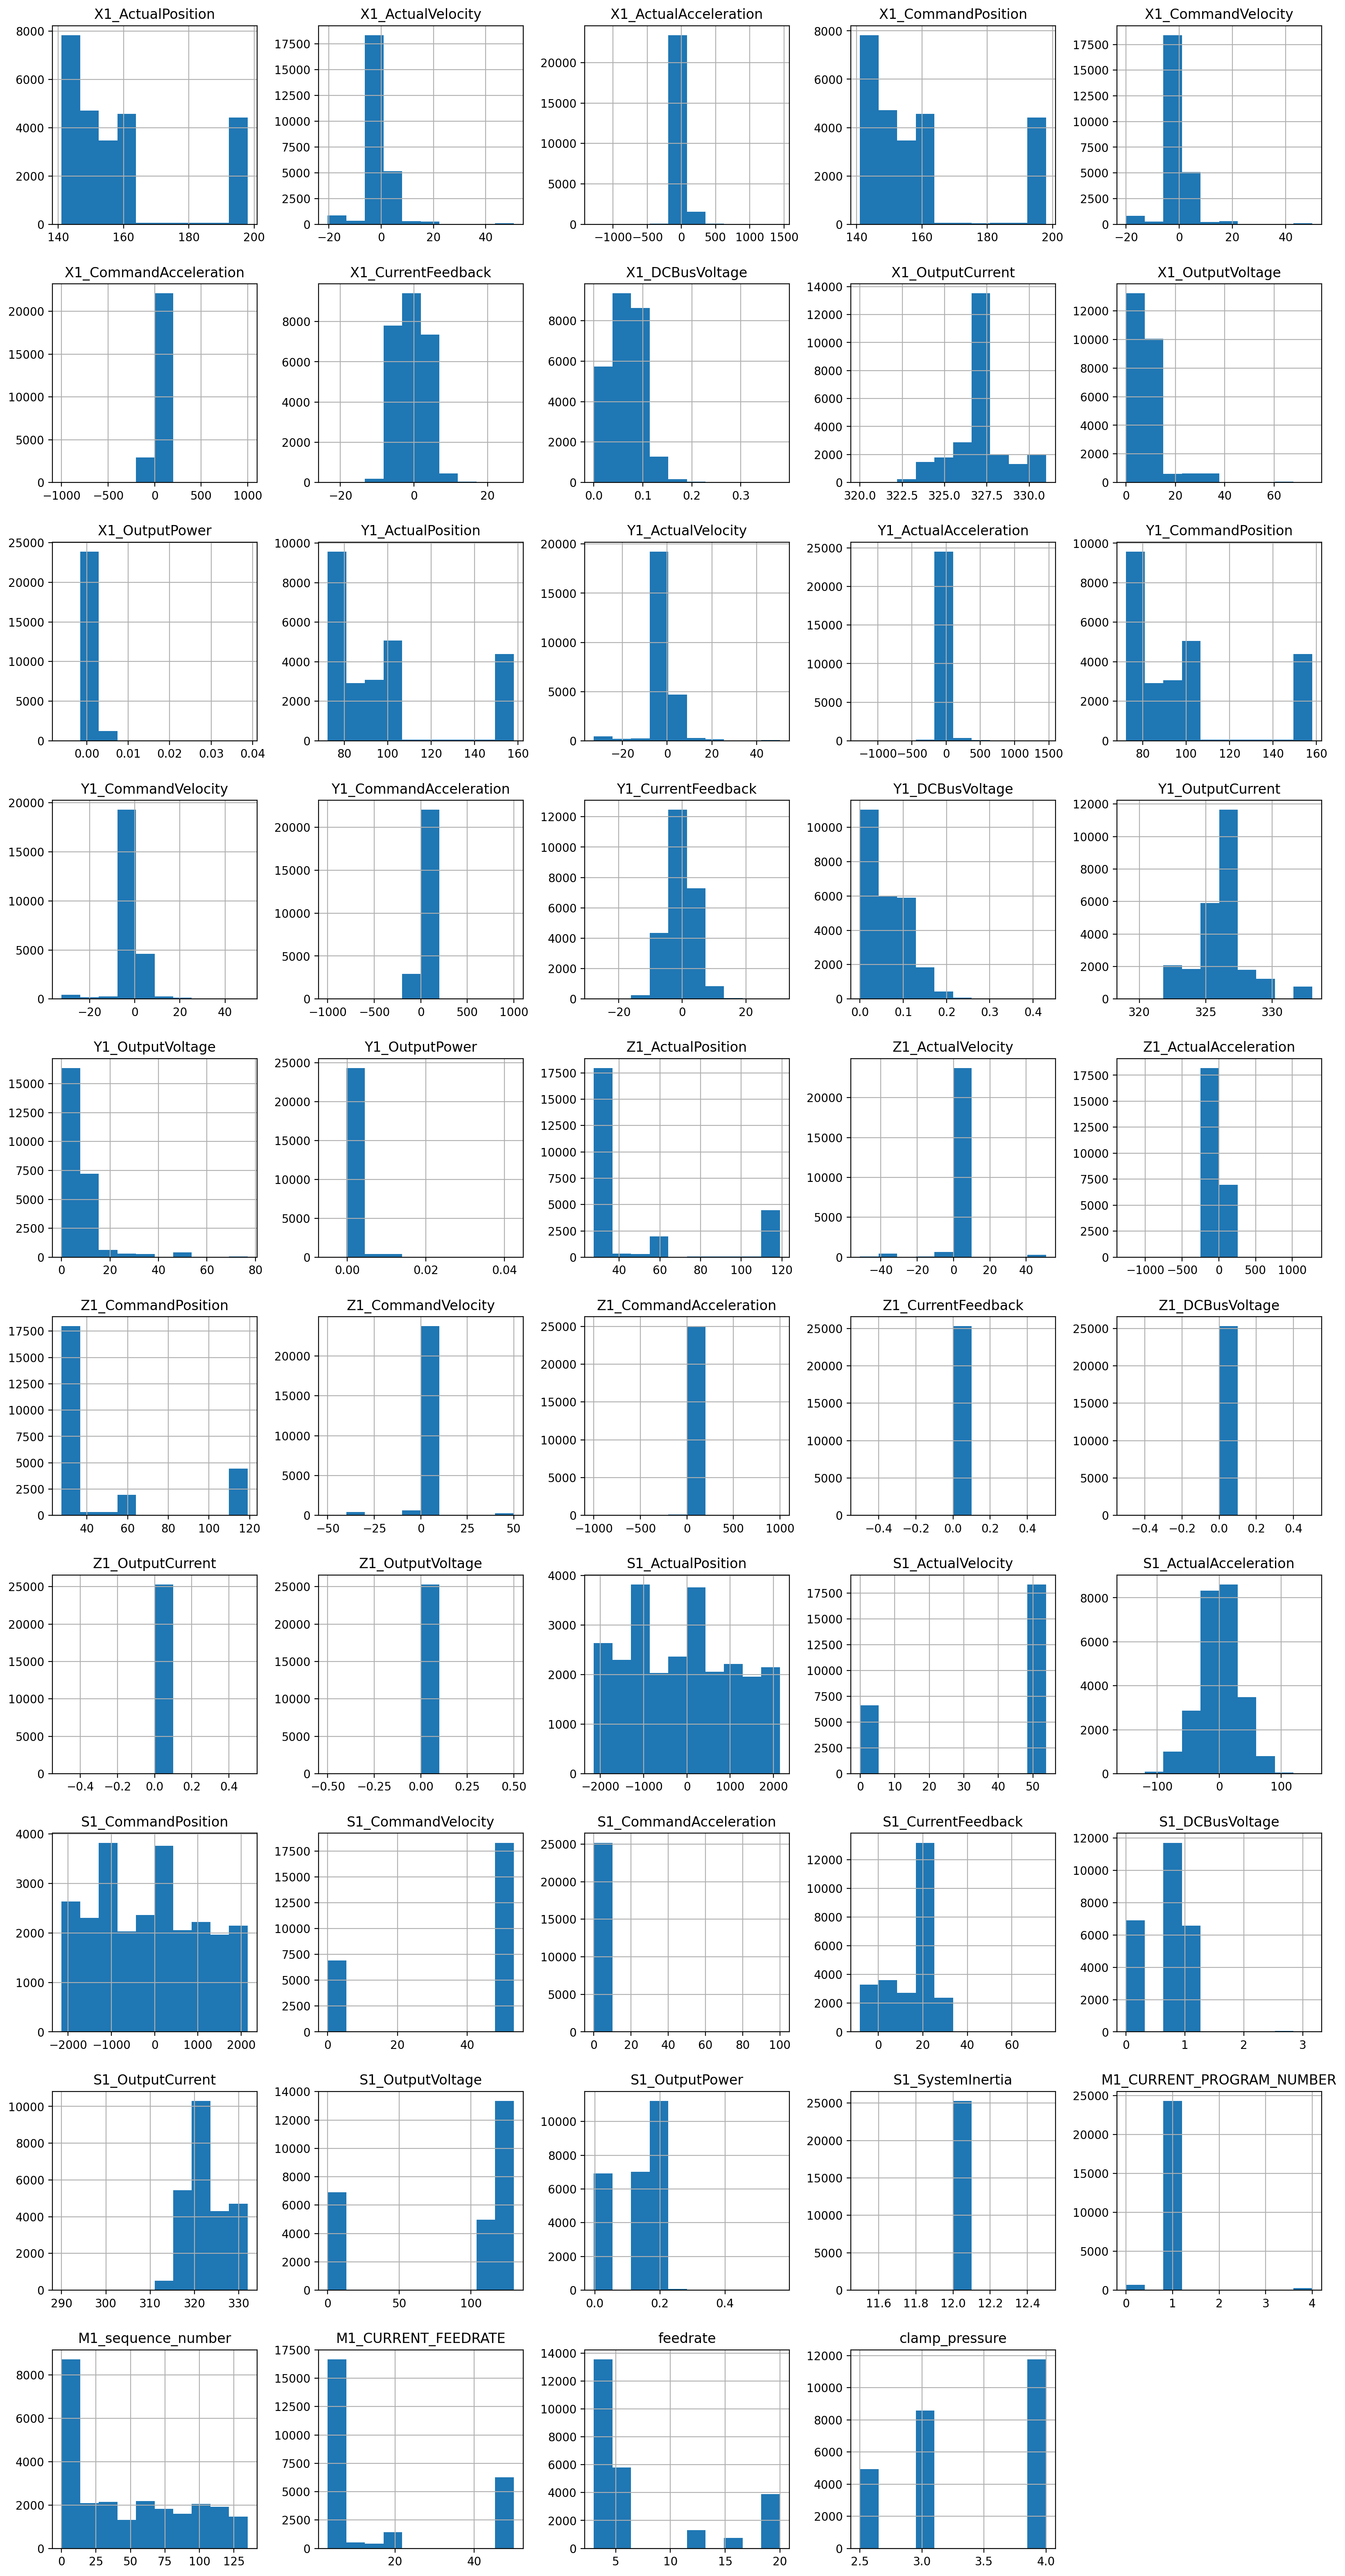

In [17]:
## ploting histogram
result[numCols].hist(figsize = (20, 40), layout = (-1, 5));

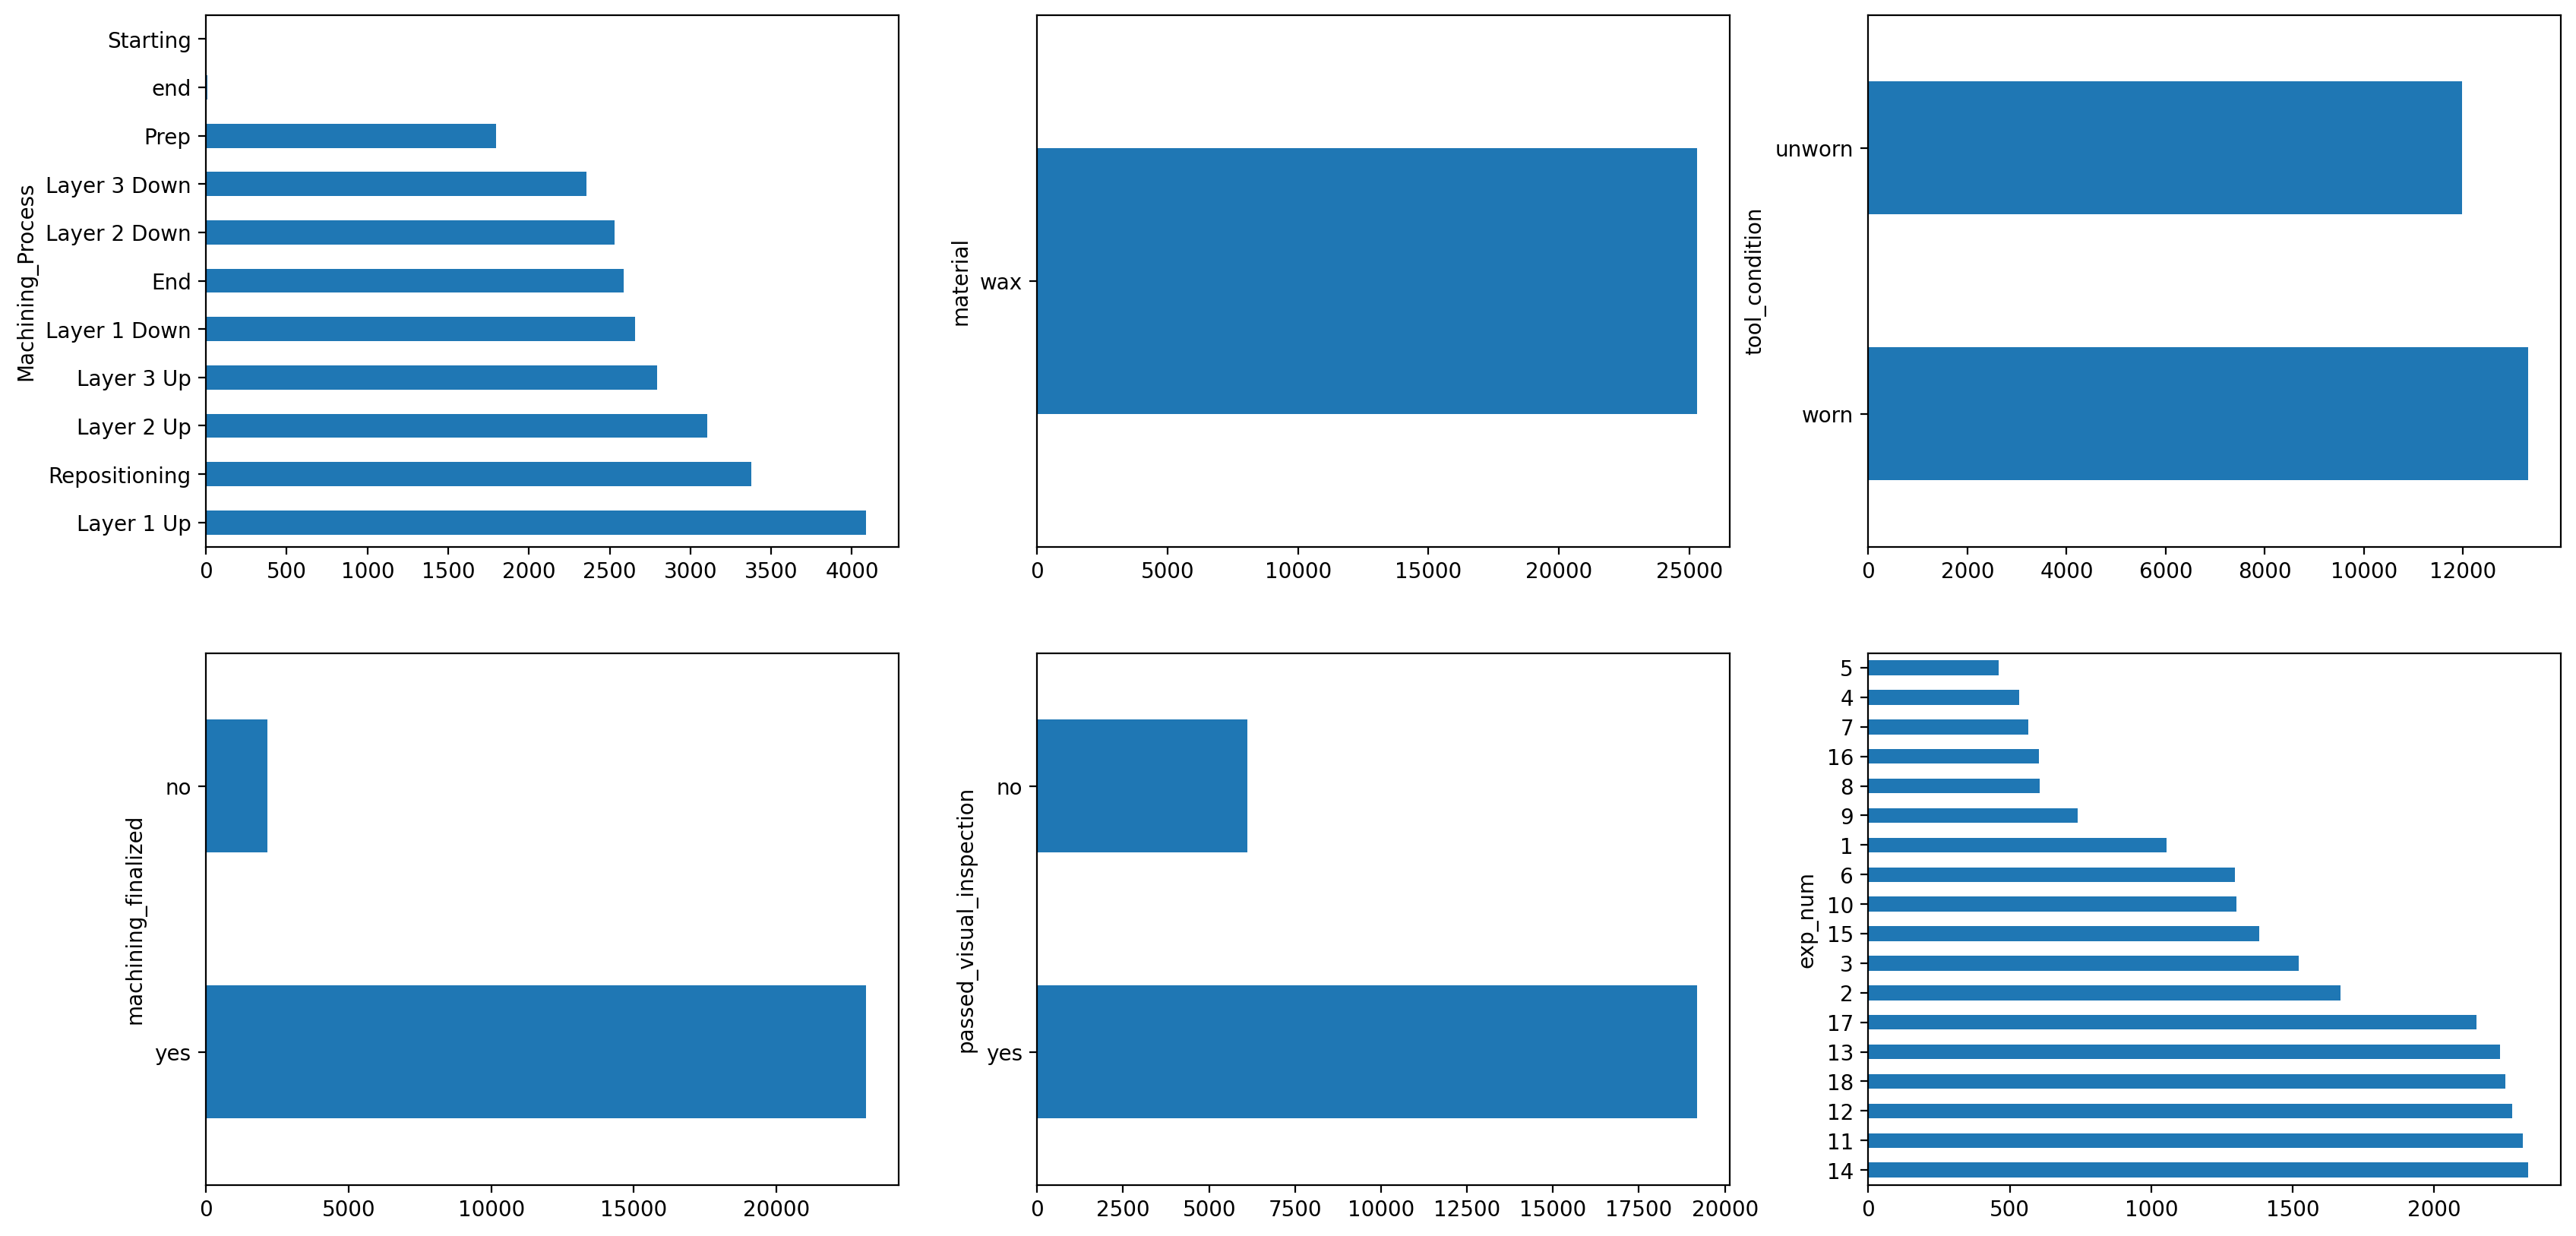

In [18]:
catCols
fig, ax = plt.subplots(2, 3, figsize = (20, 10))
ax = ax.ravel()
for e in range(len(catCols)):
    #sns.countplot(data = result[catCols], y = catCols[e], ax = ax[e], orient='y')
    result[catCols[e]].value_counts().plot(kind = 'barh', ax = ax[e])

# Remove categories columns

In [19]:
## remove categrory data except Machining_process
catColsDrop = [item for item in catCols if item != 'Machining_Process']
catColsDrop

['material',
 'tool_condition',
 'machining_finalized',
 'passed_visual_inspection',
 'exp_num']

In [20]:
## drop columns
df2 = result
df2.drop(columns = catColsDrop, axis = 1, inplace = True)
df2.head()

,X1_ActualPosition,X1_ActualVelocity,X1_ActualAcceleration,X1_CommandPosition,X1_CommandVelocity,X1_CommandAcceleration,X1_CurrentFeedback,X1_DCBusVoltage,X1_OutputCurrent,X1_OutputVoltage,...,S1_OutputCurrent,S1_OutputVoltage,S1_OutputPower,S1_SystemInertia,M1_CURRENT_PROGRAM_NUMBER,M1_sequence_number,M1_CURRENT_FEEDRATE,Machining_Process,feedrate,clamp_pressure
0,198.0,0.0,0.00,198.0,0.0,0.000000,0.18,0.0207,329.0,2.77,...,329.0,0.0,6.960000e-07,12.0,1.0,0.0,50.0,Starting,6,4.0
1,198.0,-10.8,-350.00,198.0,-13.6,-358.000000,-10.90,0.1860,328.0,23.30,...,328.0,0.0,-5.270000e-07,12.0,1.0,4.0,50.0,Prep,6,4.0
2,196.0,-17.8,-6.25,196.0,-17.9,-0.000095,-8.59,0.1400,328.0,30.60,...,328.0,0.0,9.100000e-07,12.0,1.0,7.0,50.0,Prep,6,4.0
3,194.0,-18.0,0.00,194.0,-17.9,-0.000095,-6.11,0.1300,327.0,30.30,...,328.0,0.0,1.070000e-06,12.0,1.0,7.0,50.0,Prep,6,4.0
4,193.0,-17.9,-18.80,192.0,-17.9,0.000095,-5.70,0.1140,328.0,30.50,...,328.0,0.0,1.960000e-06,12.0,1.0,7.0,50.0,Prep,6,4.0


In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25286 entries, 0 to 2252
Data columns (total 50 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   X1_ActualPosition          25286 non-null  float64
 1   X1_ActualVelocity          25286 non-null  float64
 2   X1_ActualAcceleration      25286 non-null  float64
 3   X1_CommandPosition         25286 non-null  float64
 4   X1_CommandVelocity         25286 non-null  float64
 5   X1_CommandAcceleration     25286 non-null  float64
 6   X1_CurrentFeedback         25286 non-null  float64
 7   X1_DCBusVoltage            25286 non-null  float64
 8   X1_OutputCurrent           25286 non-null  float64
 9   X1_OutputVoltage           25286 non-null  float64
 10  X1_OutputPower             25286 non-null  float64
 11  Y1_ActualPosition          25286 non-null  float64
 12  Y1_ActualVelocity          25286 non-null  float64
 13  Y1_ActualAcceleration      25286 non-null  float64
 

# replacing data

In [22]:
df2.Machining_Process.value_counts()

Machining_Process
Layer 1 Up       4085
Repositioning    3377
Layer 2 Up       3104
Layer 3 Up       2794
Layer 1 Down     2655
End              2585
Layer 2 Down     2528
Layer 3 Down     2354
Prep             1795
end                 8
Starting            1
Name: count, dtype: int64

In [23]:
## replace end with End 
## replace Starting with Prep
df2.replace({'end' : 'End', 'Starting' : 'Prep'}, inplace = True)
df2.Machining_Process.value_counts()

Machining_Process
Layer 1 Up       4085
Repositioning    3377
Layer 2 Up       3104
Layer 3 Up       2794
Layer 1 Down     2655
End              2593
Layer 2 Down     2528
Layer 3 Down     2354
Prep             1796
Name: count, dtype: int64

<Axes: ylabel='Machining_Process'>

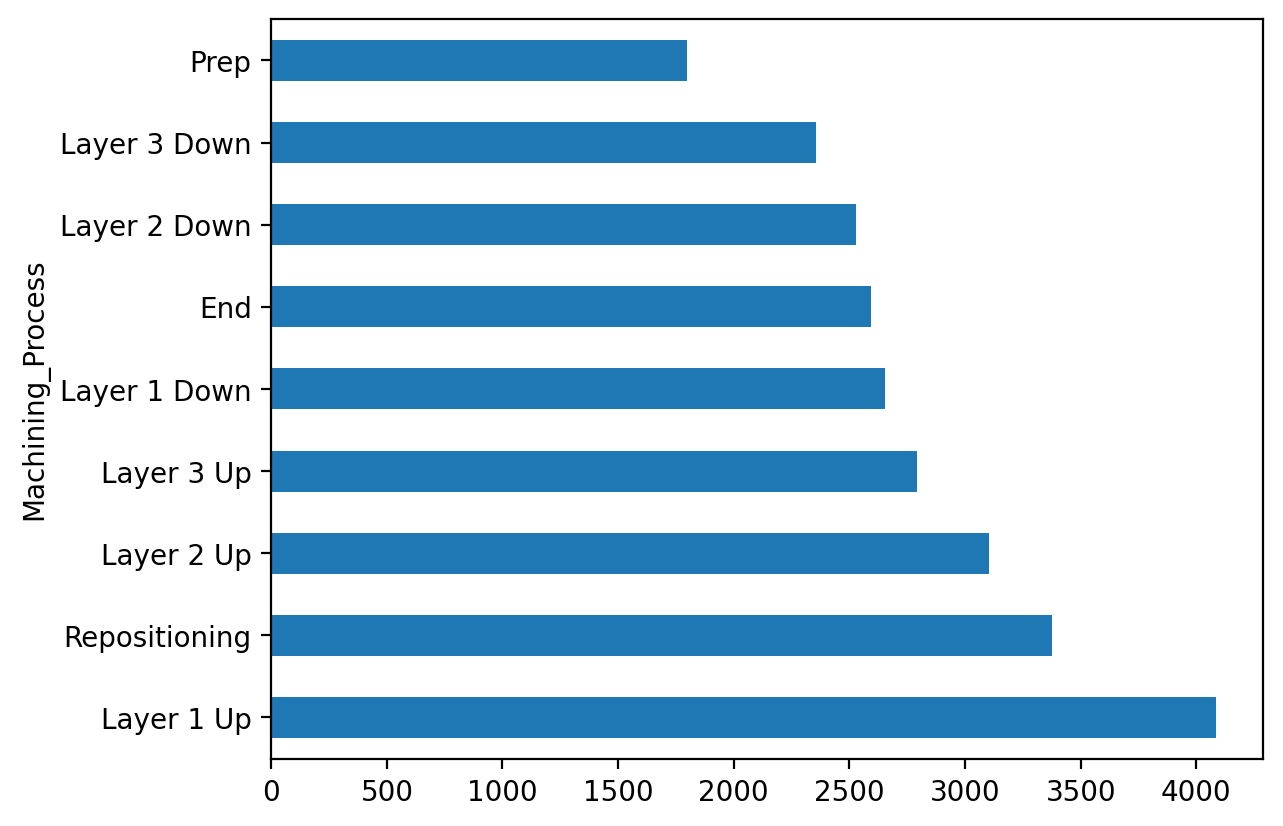

In [24]:
df2.Machining_Process.value_counts().plot(kind = 'barh')

# Transfrom Machining_Process columns with LableEnconder

In [25]:
temp = df.tool_condition.copy()
temp

0     unworn
1     unworn
2     unworn
3     unworn
4     unworn
5       worn
6       worn
7       worn
8       worn
9       worn
10    unworn
11    unworn
12      worn
13      worn
14      worn
15      worn
16    unworn
17      worn
Name: tool_condition, dtype: object

In [26]:
temp.value_counts()

tool_condition
worn      10
unworn     8
Name: count, dtype: int64

In [27]:
## label encoding
le = LabelEncoder()
le.fit_transform(temp)

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1])

In [28]:
## inverse transfrom label
le.inverse_transform([1, 0, 0, 1])

array(['worn', 'unworn', 'unworn', 'worn'], dtype=object)

## Apply to data

In [29]:
le = LabelEncoder()
df2['Machining_Process'] = le.fit_transform(df2.Machining_Process)
df2.Machining_Process.value_counts()

Machining_Process
2    4085
8    3377
4    3104
6    2794
1    2655
0    2593
3    2528
5    2354
7    1796
Name: count, dtype: int64

# Training model 

In [32]:
colx = [e for e in df2.columns if e != 'Machining_Process']
colx[:5]

['X1_ActualPosition',
 'X1_ActualVelocity',
 'X1_ActualAcceleration',
 'X1_CommandPosition',
 'X1_CommandVelocity']

In [33]:
X = df2[colx]
y = df2.Machining_Process

In [34]:
X[:5]

,X1_ActualPosition,X1_ActualVelocity,X1_ActualAcceleration,X1_CommandPosition,X1_CommandVelocity,X1_CommandAcceleration,X1_CurrentFeedback,X1_DCBusVoltage,X1_OutputCurrent,X1_OutputVoltage,...,S1_DCBusVoltage,S1_OutputCurrent,S1_OutputVoltage,S1_OutputPower,S1_SystemInertia,M1_CURRENT_PROGRAM_NUMBER,M1_sequence_number,M1_CURRENT_FEEDRATE,feedrate,clamp_pressure
0,198.0,0.0,0.00,198.0,0.0,0.000000,0.18,0.0207,329.0,2.77,...,2.740000e-19,329.0,0.0,6.960000e-07,12.0,1.0,0.0,50.0,6,4.0
1,198.0,-10.8,-350.00,198.0,-13.6,-358.000000,-10.90,0.1860,328.0,23.30,...,2.740000e-19,328.0,0.0,-5.270000e-07,12.0,1.0,4.0,50.0,6,4.0
2,196.0,-17.8,-6.25,196.0,-17.9,-0.000095,-8.59,0.1400,328.0,30.60,...,2.740000e-19,328.0,0.0,9.100000e-07,12.0,1.0,7.0,50.0,6,4.0
3,194.0,-18.0,0.00,194.0,-17.9,-0.000095,-6.11,0.1300,327.0,30.30,...,2.740000e-19,328.0,0.0,1.070000e-06,12.0,1.0,7.0,50.0,6,4.0
4,193.0,-17.9,-18.80,192.0,-17.9,0.000095,-5.70,0.1140,328.0,30.50,...,2.740000e-19,328.0,0.0,1.960000e-06,12.0,1.0,7.0,50.0,6,4.0


In [35]:
y[:5]

0    7
1    7
2    7
3    7
4    7
Name: Machining_Process, dtype: int64

In [36]:
print(f'X.shape = {X.shape}')
print(f'y.shape = {y.shape}')

X.shape = (25286, 49)
y.shape = (25286,)


# Spliting data

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.3, random_state=1, stratify=y)

In [41]:
print(f'X_train.shape = {X_train.shape}')
print(f'y_train.shape = {y_train.shape}')
print(f'X_test.shape = {X_test.shape}')
print(f'y_test.shape = {y_test.shape}')

X_train.shape = (7585, 49)
y_train.shape = (7585,)
X_test.shape = (17701, 49)
y_test.shape = (17701,)


# Standardized Data

In [42]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [43]:
X_train_t = scaler.transform(X_train)
X_test_t = scaler.transform(X_test)

# Modeling

In [45]:
ppc = Perceptron()
ppc.get_params()

{'alpha': 0.0001,
 'class_weight': None,
 'early_stopping': False,
 'eta0': 1.0,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': None,
 'random_state': 0,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [52]:
## setting hyper parameter
eta0 = 0.000001
n_iter_no_change = 100
random_state = 1
verbose = 1

In [53]:
ppc = Perceptron(eta0=eta0, n_iter_no_change=n_iter_no_change, random_state=random_state, verbose=verbose)
ppc

Perceptron(eta0=1e-06, n_iter_no_change=100, random_state=1, verbose=1)

In [54]:
ppc.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.01, NNZs: 45, Bias: -0.000008, T: 7585, Avg. loss: 0.391062
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 45, Bias: -0.000010, T: 15170, Avg. loss: 0.390521
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 45, Bias: -0.000010, T: 22755, Avg. loss: 0.384838
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.02, NNZs: 45, Bias: -0.000012, T: 30340, Avg. loss: 0.378261
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.02, NNZs: 45, Bias: -0.000012, T: 37925, Avg. loss: 0.388502
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 0.02, NNZs: 45, Bias: -0.000015, T: 45510, Avg. loss: 0.381301
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 0.02, NNZs: 45, Bias: -0.000009, T: 53095, Avg. loss: 0.380207
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 0.02, NNZs: 45, Bias: -0.000011, T: 60680, Avg. loss: 0.381575
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 0.02, NNZs: 45, Bias: -0.000011, T: 68265, Avg. loss: 0.371552
T

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.7s finished


Perceptron(eta0=1e-06, n_iter_no_change=100, random_state=1, verbose=1)

In [55]:
ppc.score(X_train, y_train)

0.14871456822676335